## Statistical Distributions

- def: math functions implemented with python code in the scipy library that we can use to model real-world processes

In [2]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

### Uniform Distribution
- discrete randint
- continous uniform

In [4]:
die_distribution = stats.randint(1, 7)
die_distribution

## Working with Distributions
- .rvs: random values, e.g. for simulation
- .pmf + .pdf: =
- .cdf + .ppf: <=
- .sf + .isf: >

In [9]:
die_distribution.rvs((5, 2))

array([[5, 5],
       [2, 4],
       [1, 6],
       [3, 4],
       [3, 5]])

In [10]:
# What is the likelihood we roll a 4
die_distribution.pmf(4)

0.16666666666666666

In [11]:
# What is the probablity that we roll a 3 or less
die_distribution.cdf(3)

0.5

In [12]:
# What is the likelihood we roll greater than 2
die_distribution.sf(2)

0.6666666666666667

## Mini Exercise

- Likelihood of rolling a 1
- Likelihood of rolling greater than a 4?
- 50% of values will be greater than what number?

In [13]:
#What is the likelihood we roll a 1
# This is the theoretical probabality
die_distribution.pmf(1)

0.16666666666666666

In [16]:
# This is experimental probablity
(np.random.randint(1, 7, 1000) == 1).mean()

0.151

In [14]:
# What is the likelihood of rolling greater than a 4
# This is the theoretical probabality
die_distribution.sf(4)

0.33333333333333337

In [17]:
# This is experimental probablity
(np.random.randint(1, 7, 1000) > 4).mean()

0.343

In [20]:
# 50% of values will be greater than what number
die_distribution.isf(.5)

3.0

## Normal Distribution
- continuous random var
- mean, $\mu$, the center
- standard deviation, $\sigma$, the "spread"

In [23]:
coffee_consumption = stats.norm(10, 1)
coffee_consumption

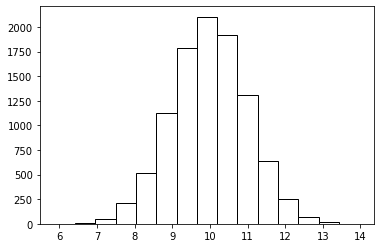

In [29]:
plt.hist(coffee_consumption.rvs(10_000), bins=15, fc='white', ec='black')
plt.show()

In [33]:
# what's the likelihood we consume less (or equal to) than 8 liters of coffee one day?
coffee_consumption.cdf(8)

0.022750131948179195

In [35]:
# how little coffee would we have to drink to be in the bottom quarter of all days of coffee consumption?
coffee_consumption.ppf(.25)

9.325510249803918

Say the average internet consumption for Spectrum for a neighborhood is 1250 GB +- 100GB. This is the historical
average for the last 3 months.

On Monday we observed 1500GB of consumption. Assuming internet usage patterns haven't changed, how likely is it we'd see this
number due to chance?

In [37]:
mean =1250
stdv = 100

stats.norm(1250, 100).sf(1500)

# this is the same as saying

internet_usage = stats.norm(1250, 100)
internet_usage.sf(1500)

0.006209665325776132

In [39]:
# How much usage constitutes the top 10% of all days
internet_usage.isf(.10)

1378.15515655446

## Binomial Distribution
- discrete random var: number of "successes"
- $n$, number of trials
    - outcome of one trial is binary, yes or no
- $p$, probability of success for one trial

In [41]:
# There's a 70 percent chance a food truck shows up.
# What is the likelihood a food truck shows up 2 days out of the week?

# Outcome is # of days a food truck shows up
# n == 5
# p == 70% or .70

n = 5
p =.7

stats.binom(n, p).pmf(2)

0.1323

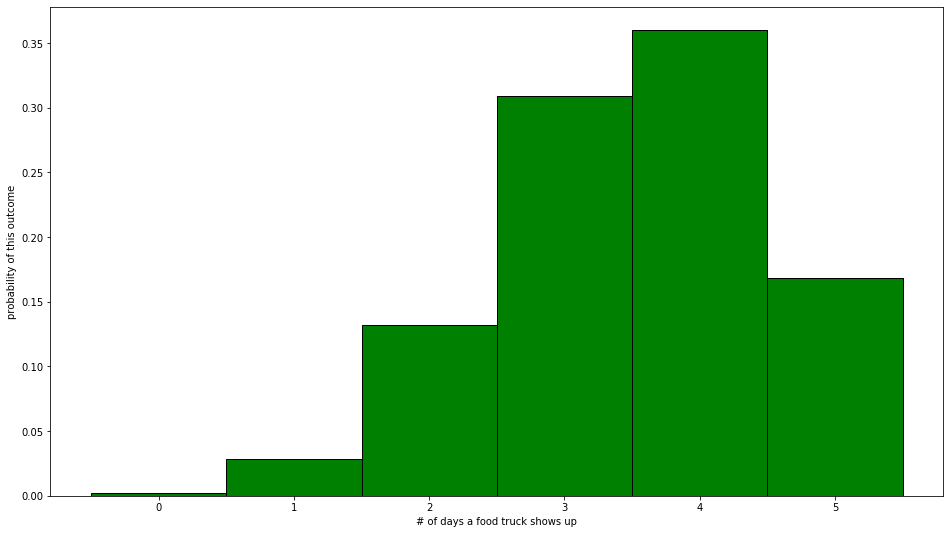

In [47]:
x = np.arange(0, 6)
y = stats.binom(n, p).pmf(x)

plt.figure(figsize=(16,9))
plt.bar(x, y, width=1, ec='black', fc='green')
plt.xlabel('# of days a food truck shows up')
plt.ylabel('probability of this outcome')
plt.show()

In [48]:
# What's the likelihood that a food truck shows up 3 or less days out of the week?

n = 5
p = .7

stats.binom(n, p).cdf(3)

0.47178000000000003

In [49]:
# What's the likelihood that a food truck shows up 3 or less days out of the week?
# rephrase in order to use our fucntions
#likelihood a food truck shows up 2 or less days out of the week

stats.binom(n, p).cdf(2)

0.16308000000000006

In [53]:
# P(less than 3 days) is equal to
# P(3 or less days) -P(3)

stats.binom(n, p).cdf(3) - stats.binom(n, p).pmf(3)

0.1630800000000001

Say you go to the grocercy store, and there's a 80% chance they have toilet paper.
If the Curie cohort goes to the store, how likely is it we all can buy tiolet paper?

In [60]:
n = 17
p = .8

stats.binom(n, p).pmf(n) # likelihood that all trials are successful

0.0225179981368525

Suppose there is a surprise stats quiz this afternoon, and you haven't studied. There's 10 multiple choice questions, each with 4 answers. If you guess at random for each question, what's the likelihood that you pass the quiz?

In [64]:
n = 10
p = .25

stats.binom(n, p).sf(6) # 7 or more correct answers

0.003505706787109374

## Poisson Distribution
- discrete random var: number of events
- $\lambda$: avg rate over time

Suppose Codeup students ask, on average, 3.5 questions per lecture. What is the likeihood that more than 4 questions are asked during the statistical distributions lesson?

In [66]:
stats.poisson(3.5).sf(4)

0.2745550466903957

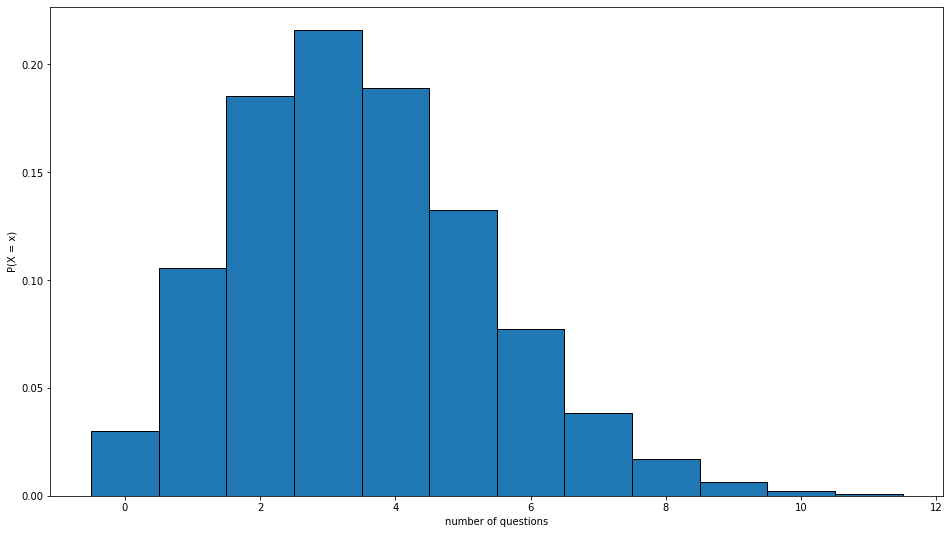

In [71]:
plt.figure(figsize=(16, 9))
x = np.arange(0, 12)
y = stats.poisson(3.5).pmf(x)

plt.bar(x, y, ec='black', width=1)
plt.ylabel('P(X = x)')
plt.xlabel('number of questions')
plt.show()

In [72]:
# what is the likelihood that 2 or fewer questions are asked?
stats.poisson(3.5).cdf(2)

0.32084719886213414

In [73]:
# For modeling food trucks we used a binomal distribution
# Given P(food trucks shows up one day), numbers of days

# for a poisson distribution, we need an average rate over time
# given number of food trucks per week
# on average 3 food trucks show up per week
# for a given week, what's the likelihood that a food truck shows up every day -- p(5 or more trucks show up)

stats.poisson(3).sf(4)

0.18473675547622787

[Text(0.5, 1.0, 'Poisson Dis -- number of days that a food truck shows up')]

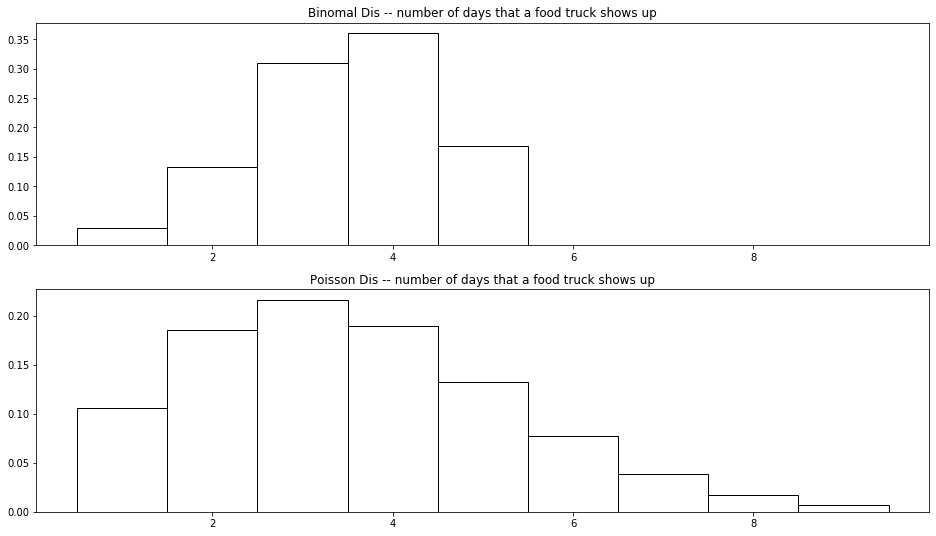

In [78]:
n = 5
p = .7

x = np.arange(1,10)
y1 = stats.binom(n, p).pmf(x)
y2 = stats.poisson(n * p).pmf(x)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 9))

ax1.bar(x, y1, width=1, ec='black', fc='white')
ax1.set(title='Binomal Dis -- number of days that a food truck shows up')

ax2.bar(x, y2, width=1, ec='black', fc='white')
ax2.set(title='Poisson Dis -- number of days that a food truck shows up')



In [3]:
n = 618
p = .7

stats.binom(n, p).pmf(2)

7.535855e-318

In [4]:
my_normal_distribution = norm(618, 70)
my_normal_distribution.sf(80)

NameError: name 'norm' is not defined